In [174]:
import yfinance as yf
import mplfinance as mpf
import pandas as pd
import datetime
import matplotlib.pyplot as plt
import numpy as np
import plotly.express as px
today = pd.Timestamp(datetime.datetime.now())
today = today.strftime('%m-%d-%y')
print(f'Today is {today}')


Today is 03-14-23


In [175]:
def convert_scale(value):
    if value.endswith('M'):
        return float(value[:-1]) * 10**6
    elif value.endswith('B'):
        return float(value[:-1]) * 10**9
    elif value.endswith('T'):
        return float(value[:-1]) * 10**12
    else:
        return float(value)

def html(url):
    return pd.read_html(url)

In [176]:
most_act = html('https://finance.yahoo.com/most-active')[0]
most_act

,Symbol,Name,Price (Intraday),Change,% Change,Volume,Avg Vol (3 month),Market Cap,PE Ratio (TTM),52 Week Range
0,BAC,Bank of America Corporation,28.51,-1.76,-5.81%,217.881M,43.001M,228.059B,9.02,NaN
1,TSLA,"Tesla, Inc.",174.48,1.04,+0.60%,167.79M,184.126M,552.072B,50.57,NaN
2,SCHW,The Charles Schwab Corporation,51.91,-6.79,-11.57%,147.687M,12.216M,94.939B,16.80,NaN
3,FRC,First Republic Bank,31.21,-50.55,-61.83%,132.136M,4.799M,5.812B,4.45,NaN
4,F,Ford Motor Company,12.03,-0.07,-0.58%,118.471M,64.747M,47.954B,NaN,NaN
5,KEY,KeyCorp,11.38,-4.28,-27.33%,110.502M,13.82M,10.604B,6.09,NaN
6,AAPL,Apple Inc.,150.47,1.97,+1.33%,84.457M,72.506M,2.381T,25.90,NaN
7,HBAN,Huntington Bancshares Incorporated,11.12,-2.25,-16.83%,79.743M,14.981M,16.12B,9.50,NaN
8,WFC,Wells Fargo & Company,38.41,-2.95,-7.13%,78.613M,19.7M,145.723B,12.16,NaN
9,AMD,"Advanced Micro Devices, Inc.",82.01,-0.66,-0.80%,65.269M,56.508M,132.15B,101.25,NaN


In [177]:
# reading in from a website
most_active = pd.read_html('https://finance.yahoo.com/most-active')[0]
most_active['PE Ratio (TTM)'] = most_active['PE Ratio (TTM)'].fillna(0)
most_active.dropna(axis=1, thresh=9, inplace=True)
#most_active.set_index('Symbol',inplace=True)
#most_active['Volume', 'Avg Vol (3 month)', 'Market Cap'] = most_active['Volume', 'Avg Vol (3 month)', 'Market Cap'].apply(convert_scale)
most_active.head()
#most_active.info()
#most_active.shape
# dataset has columns that have NaN values
most_active['Volume'] = most_active['Volume'].apply(convert_scale)
most_active['Avg Vol (3 month)'] = most_active['Avg Vol (3 month)'].apply(convert_scale)
most_active['Market Cap'] = most_active['Market Cap'].apply(convert_scale)

#most_active[['Volume', 'Avg Vol (3 month)', 'Market Cap']] = most_active[['Volume', 'Avg Vol (3 month)', 'Market Cap']].apply(convert_scale)

most_active
#most_active.info()

,Symbol,Name,Price (Intraday),Change,% Change,Volume,Avg Vol (3 month),Market Cap,PE Ratio (TTM)
0,BAC,Bank of America Corporation,28.51,-1.76,-5.81%,217881000.0,43001000.0,2.280590e+11,9.02
1,TSLA,"Tesla, Inc.",174.48,1.04,+0.60%,167790000.0,184126000.0,5.520720e+11,50.57
2,SCHW,The Charles Schwab Corporation,51.91,-6.79,-11.57%,147687000.0,12216000.0,9.493900e+10,16.80
3,FRC,First Republic Bank,31.21,-50.55,-61.83%,132136000.0,4799000.0,5.812000e+09,4.45
4,F,Ford Motor Company,12.03,-0.07,-0.58%,118471000.0,64747000.0,4.795400e+10,0.00
5,KEY,KeyCorp,11.38,-4.28,-27.33%,110502000.0,13820000.0,1.060400e+10,6.09
6,AAPL,Apple Inc.,150.47,1.97,+1.33%,84457000.0,72506000.0,2.381000e+12,25.90
7,HBAN,Huntington Bancshares Incorporated,11.12,-2.25,-16.83%,79743000.0,14981000.0,1.612000e+10,9.50
8,WFC,Wells Fargo & Company,38.41,-2.95,-7.13%,78613000.0,19700000.0,1.457230e+11,12.16
9,AMD,"Advanced Micro Devices, Inc.",82.01,-0.66,-0.80%,65269000.0,56508000.0,1.321500e+11,101.25


   Symbol                                     Name  Price (Intraday)   Change  \
0    PRVB                     Provention Bio, Inc.           24.1000  17.4000   
1   SHZNF  Shenzhen Expressway Corporation Limited            0.8913   0.1413   
2    ILMN                           Illumina, Inc.          226.9400  32.9300   
3    MSTR               MicroStrategy Incorporated          223.1600  31.1500   
4    PROK                          ProKidney Corp.           13.7800   1.8100   
5    SGEN                              Seagen Inc.          197.6500  25.0400   
6     GFI                      Gold Fields Limited           10.5400   1.0800   
7    COIN                    Coinbase Global, Inc.           59.1700   5.7300   
8    SAGE                  Sage Therapeutics, Inc.           43.3600   3.8000   
9     HMY      Harmony Gold Mining Company Limited            3.4600   0.3000   
10     AU                AngloGold Ashanti Limited           19.2800   1.6700   
11    DNA           Ginkgo B

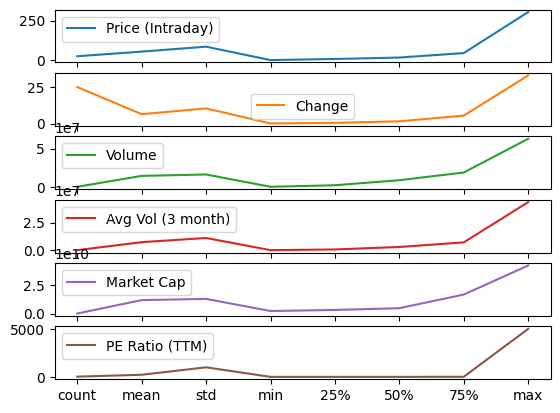

In [178]:
gainers = pd.read_html('https://finance.yahoo.com/gainers')[0]
gainers.head()
gainers['PE Ratio (TTM)'] = gainers['PE Ratio (TTM)'].fillna(0)
gainers.dropna(axis=1, thresh=9, inplace=True)
#gainers.set_index('Symbol', inplace=True)
gainers.head()
#gainers.info()
gainers.dtypes
gainers['Volume'] = gainers['Volume'].apply(convert_scale)
gainers['Avg Vol (3 month)'] = gainers['Avg Vol (3 month)'].apply(convert_scale)
gainers['Market Cap'] = gainers['Market Cap'].apply(convert_scale)
gainers.dtypes
gainers.describe().plot(subplots=True)
print(gainers)



In [179]:
losers = pd.read_html('https://finance.yahoo.com/losers')[0]
losers['PE Ratio (TTM)'] = losers['PE Ratio (TTM)'].fillna(0)
losers.dropna(axis=1, thresh=9, inplace=True)
#losers.set_index('Symbol',inplace=True)
losers.head()
#losers.info()
losers['Volume'] = losers['Volume'].apply(convert_scale)
losers['Avg Vol (3 month)'] = losers['Avg Vol (3 month)'].apply(convert_scale)
losers['Market Cap'] = losers['Market Cap'].apply(convert_scale)
losers

,Symbol,Name,Price (Intraday),Change,% Change,Volume,Avg Vol (3 month),Market Cap,PE Ratio (TTM)
0,FRC,First Republic Bank,31.21,-50.55,-61.83%,132136000.0,4799000.0,5.812000e+09,4.45
1,WAL,Western Alliance Bancorporation,26.12,-23.22,-47.06%,59450000.0,2390000.0,2.863000e+09,3.90
2,FRC-PH,First Republic Bank,11.80,-4.67,-28.35%,797099.0,37012.0,7.601000e+09,1.50
3,CMA,Comerica Incorporated,42.54,-16.27,-27.67%,23648000.0,2026000.0,5.588000e+09,5.28
4,KEY,KeyCorp,11.38,-4.28,-27.33%,110502000.0,13820000.0,1.060400e+10,6.09
5,FRC-PI,First Republic Bank,12.74,-4.66,-26.78%,1200000.0,49999.0,8.032000e+09,1.62
6,ZION,"Zions Bancorporation, National Association",29.97,-10.38,-25.72%,26067000.0,2060000.0,4.455000e+09,5.30
7,KEY-PK,KeyCorp,16.83,-5.42,-24.36%,289667.0,50544.0,1.398700e+10,6.80
8,KEY-PJ,KeyCorp,17.18,-5.07,-22.79%,275321.0,39836.0,1.146500e+10,6.94
9,FHN,First Horizon Corporation,16.04,-4.06,-20.20%,39218000.0,6063000.0,8.619000e+09,13.71


In [180]:
merge1 = pd.merge(most_active, gainers, how='outer' )
print(merge1.shape)
merge1.head()


(49, 9)


,Symbol,Name,Price (Intraday),Change,% Change,Volume,Avg Vol (3 month),Market Cap,PE Ratio (TTM)
0,BAC,Bank of America Corporation,28.51,-1.76,-5.81%,217881000.0,43001000.0,2.280590e+11,9.02
1,TSLA,"Tesla, Inc.",174.48,1.04,+0.60%,167790000.0,184126000.0,5.520720e+11,50.57
2,SCHW,The Charles Schwab Corporation,51.91,-6.79,-11.57%,147687000.0,12216000.0,9.493900e+10,16.80
3,FRC,First Republic Bank,31.21,-50.55,-61.83%,132136000.0,4799000.0,5.812000e+09,4.45
4,F,Ford Motor Company,12.03,-0.07,-0.58%,118471000.0,64747000.0,4.795400e+10,0.00


In [181]:
merged_df = pd.merge(merge1, losers, how='outer')
print(merged_df.shape)
merged_df

(69, 9)


,Symbol,Name,Price (Intraday),Change,% Change,Volume,Avg Vol (3 month),Market Cap,PE Ratio (TTM)
0,BAC,Bank of America Corporation,28.51,-1.76,-5.81%,217881000.0,43001000.0,2.280590e+11,9.02
1,TSLA,"Tesla, Inc.",174.48,1.04,+0.60%,167790000.0,184126000.0,5.520720e+11,50.57
2,SCHW,The Charles Schwab Corporation,51.91,-6.79,-11.57%,147687000.0,12216000.0,9.493900e+10,16.80
3,FRC,First Republic Bank,31.21,-50.55,-61.83%,132136000.0,4799000.0,5.812000e+09,4.45
4,F,Ford Motor Company,12.03,-0.07,-0.58%,118471000.0,64747000.0,4.795400e+10,0.00
...,...,...,...,...,...,...,...,...,...
64,WTFCM,Wintrust Financial Corporation,20.56,-3.91,-15.96%,61607.0,8637.0,2.915000e+09,2.89
65,TCBI,"Texas Capital Bancshares, Inc.",51.40,-9.73,-15.92%,3526000.0,489064.0,2.482000e+09,8.82
66,UMBF,UMB Financial Corporation,65.08,-12.01,-15.58%,2507000.0,253464.0,3.157000e+09,7.60
67,HQY,"HealthEquity, Inc.",52.44,-9.24,-14.98%,2767000.0,748015.0,4.439000e+09,0.00


In [182]:
# find if there are any duplicated rows
duplicate = merged_df[merged_df.duplicated()]
duplicate

,Symbol,Name,Price (Intraday),Change,% Change,Volume,Avg Vol (3 month),Market Cap,PE Ratio (TTM)


In [183]:
'''merged_df['PE Ratio (TTM)'] = merged_df['PE Ratio (TTM)'].fillna(0)
merged_df.dropna(axis=1, thresh=9, inplace=True)
#gainers.set_index('Symbol', inplace=True)
gainers.head()
#gainers.info()
gainers.dtypes
merged_df['Volume'] = merged_df['Volume'].apply(convert_scale)
merged_df['Avg Vol (3 month)'] = merged_df['Avg Vol (3 month)'].apply(convert_scale)
merged_df['Market Cap'] = merged_df['Market Cap'].apply(convert_scale)
merged_df.dtypes
merged_df.describe().plot(subplots=True)
print(merged_df)'''

"merged_df['PE Ratio (TTM)'] = merged_df['PE Ratio (TTM)'].fillna(0)\nmerged_df.dropna(axis=1, thresh=9, inplace=True)\n#gainers.set_index('Symbol', inplace=True)\ngainers.head()\n#gainers.info()\ngainers.dtypes\nmerged_df['Volume'] = merged_df['Volume'].apply(convert_scale)\nmerged_df['Avg Vol (3 month)'] = merged_df['Avg Vol (3 month)'].apply(convert_scale)\nmerged_df['Market Cap'] = merged_df['Market Cap'].apply(convert_scale)\nmerged_df.dtypes\nmerged_df.describe().plot(subplots=True)\nprint(merged_df)"

In [184]:
concat = pd.concat([most_active, gainers, losers])
print(concat.shape)
print(f'Datatype before the change \n {concat.dtypes}')
#concat['% Change'] = 
#concat['% Change'].replace({'%' : ''}, regex=True)
concat['% Change'] = pd.to_numeric(concat['% Change'].replace({'%' : ''}, regex=True))
concat.head()


print(f'Datatypes after changes')
concat.info()

(75, 9)
Datatype before the change 
 Symbol                object
Name                  object
Price (Intraday)     float64
Change               float64
% Change              object
Volume               float64
Avg Vol (3 month)    float64
Market Cap           float64
PE Ratio (TTM)       float64
dtype: object
Datatypes after changes
<class 'pandas.core.frame.DataFrame'>
Int64Index: 75 entries, 0 to 24
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Symbol             75 non-null     object 
 1   Name               75 non-null     object 
 2   Price (Intraday)   75 non-null     float64
 3   Change             75 non-null     float64
 4   % Change           75 non-null     float64
 5   Volume             75 non-null     float64
 6   Avg Vol (3 month)  75 non-null     float64
 7   Market Cap         75 non-null     float64
 8   PE Ratio (TTM)     75 non-null     float64
dtypes: float64(7), object(2)
memo

In [185]:
# find if there are any duplicated rows
duplicate = concat[concat.duplicated()]
duplicate

,Symbol,Name,Price (Intraday),Change,% Change,Volume,Avg Vol (3 month),Market Cap,PE Ratio (TTM)
23,PLTR,Palantir Technologies Inc.,7.87,0.52,7.07,62795000.0,43506000.0,1.653800e+10,0.00
0,FRC,First Republic Bank,31.21,-50.55,-61.83,132136000.0,4799000.0,5.812000e+09,4.45
1,WAL,Western Alliance Bancorporation,26.12,-23.22,-47.06,59450000.0,2390000.0,2.863000e+09,3.90
4,KEY,KeyCorp,11.38,-4.28,-27.33,110502000.0,13820000.0,1.060400e+10,6.09
15,TFC,Truist Financial Corporation,32.24,-6.60,-16.99,61717000.0,7945000.0,4.281200e+10,7.81
17,HBAN,Huntington Bancshares Incorporated,11.12,-2.25,-16.83,79743000.0,14981000.0,1.612000e+10,9.50


In [186]:
concat.drop_duplicates(keep='first', inplace=True)
concat.shape

(69, 9)

In [187]:
concat.dtypes

Symbol                object
Name                  object
Price (Intraday)     float64
Change               float64
% Change             float64
Volume               float64
Avg Vol (3 month)    float64
Market Cap           float64
PE Ratio (TTM)       float64
dtype: object

In [188]:

concat.describe()

,Price (Intraday),Change,% Change,Volume,Avg Vol (3 month),Market Cap,PE Ratio (TTM)
count,69.000000,69.000000,69.000000,6.900000e+01,6.900000e+01,6.900000e+01,69.000000
mean,42.476975,-1.140561,-1.896812,3.495537e+07,1.455726e+07,8.142241e+10,86.836812
std,59.711951,10.831854,35.606704,4.426959e+07,2.741849e+07,3.135631e+11,608.230750
min,0.891300,-50.550000,-61.830000,1.654600e+04,5.590000e+02,2.017000e+09,0.000000
25%,11.450000,-4.280000,-16.830000,2.507000e+06,5.031330e+05,3.428000e+09,0.000000
50%,19.600000,-0.430000,-2.990000,1.653200e+07,3.553000e+06,8.071000e+09,5.300000
75%,45.120000,1.130000,8.180000,4.909300e+07,1.818100e+07,1.787800e+10,10.060000
max,303.440000,32.930000,259.700000,2.178810e+08,1.841260e+08,2.381000e+12,5057.330000


In [189]:
# find all rows that have 'Corp' in its name?
concat.loc[concat.Name.str.contains('(?i)Corp', regex=True)]

,Symbol,Name,Price (Intraday),Change,% Change,Volume,Avg Vol (3 month),Market Cap,PE Ratio (TTM)
0,BAC,Bank of America Corporation,28.5100,-1.7600,-5.81,217881000.0,43001000.0,2.280590e+11,9.02
2,SCHW,The Charles Schwab Corporation,51.9100,-6.7900,-11.57,147687000.0,12216000.0,9.493900e+10,16.80
5,KEY,KeyCorp,11.3800,-4.2800,-27.33,110502000.0,13820000.0,1.060400e+10,6.09
7,HBAN,Huntington Bancshares Incorporated,11.1200,-2.2500,-16.83,79743000.0,14981000.0,1.612000e+10,9.50
12,TFC,Truist Financial Corporation,32.2400,-6.6000,-16.99,61717000.0,7945000.0,4.281200e+10,7.81
14,WAL,Western Alliance Bancorporation,26.1200,-23.2200,-47.06,59450000.0,2390000.0,2.863000e+09,3.90
17,CCL,Carnival Corporation & plc,9.2400,-0.4500,-4.64,49093000.0,39044000.0,1.200800e+10,0.00
18,NYCB,"New York Community Bancorp, Inc.",6.4000,-0.9700,-13.16,47972000.0,9866000.0,4.371000e+09,5.42
19,FITB,Fifth Third Bancorp,26.2500,-4.1200,-13.57,48287000.0,5864000.0,1.787800e+10,10.06
1,SHZNF,Shenzhen Expressway Corporation Limited,0.8913,0.1413,18.84,33000.0,559.0,3.090000e+09,5.24


In [190]:
volume_change = concat.query('Volume >= 20000000 and Change <= -5')
volume_change

,Symbol,Name,Price (Intraday),Change,% Change,Volume,Avg Vol (3 month),Market Cap,PE Ratio (TTM)
2,SCHW,The Charles Schwab Corporation,51.91,-6.79,-11.57,147687000.0,12216000.0,9.493900e+10,16.80
3,FRC,First Republic Bank,31.21,-50.55,-61.83,132136000.0,4799000.0,5.812000e+09,4.45
12,TFC,Truist Financial Corporation,32.24,-6.60,-16.99,61717000.0,7945000.0,4.281200e+10,7.81
14,WAL,Western Alliance Bancorporation,26.12,-23.22,-47.06,59450000.0,2390000.0,2.863000e+09,3.90
3,CMA,Comerica Incorporated,42.54,-16.27,-27.67,23648000.0,2026000.0,5.588000e+09,5.28
6,ZION,"Zions Bancorporation, National Association",29.97,-10.38,-25.72,26067000.0,2060000.0,4.455000e+09,5.30


In [191]:
concat.query('`% Change` < -50')[['Name', '% Change']]

,Name,% Change
3,First Republic Bank,-61.83


In [192]:

Symbol_s = concat.loc[(concat['PE Ratio (TTM)']>=19) & (concat['Change']<= -5) & (concat['Symbol'].str.startswith('S')),['Symbol', 'Name']]
Symbol_s

,Symbol,Name


In order to filter a DataFrame column that has spaces with the query method, we wrap the column using backticks. While this may not look great, it does allow us to use any column in the method.

In [193]:
large_market_cap = concat.query("`Market Cap` > 200000000000")
print(large_market_cap)
large_market_cap.Symbol


   Symbol                         Name  Price (Intraday)  Change  % Change  \
0     BAC  Bank of America Corporation             28.51   -1.76     -5.81   
1    TSLA                  Tesla, Inc.            174.48    1.04      0.60   
6    AAPL                   Apple Inc.            150.47    1.97      1.33   
10   AMZN             Amazon.com, Inc.             92.43    1.70      1.87   
24    JPM         JPMorgan Chase & Co.            131.25   -2.40     -1.80   

         Volume  Avg Vol (3 month)    Market Cap  PE Ratio (TTM)  
0   217881000.0         43001000.0  2.280590e+11            9.02  
1   167790000.0        184126000.0  5.520720e+11           50.57  
6    84457000.0         72506000.0  2.381000e+12           25.90  
10   69562000.0         71452000.0  9.471580e+11            0.00  
24   42616000.0         10972000.0  3.863160e+11           10.58  


0      BAC
1     TSLA
6     AAPL
10    AMZN
24     JPM
Name: Symbol, dtype: object

In [194]:
top_5_company = concat.nlargest(5,['Volume'])
top_5_company


,Symbol,Name,Price (Intraday),Change,% Change,Volume,Avg Vol (3 month),Market Cap,PE Ratio (TTM)
0,BAC,Bank of America Corporation,28.51,-1.76,-5.81,217881000.0,43001000.0,2.280590e+11,9.02
1,TSLA,"Tesla, Inc.",174.48,1.04,0.60,167790000.0,184126000.0,5.520720e+11,50.57
2,SCHW,The Charles Schwab Corporation,51.91,-6.79,-11.57,147687000.0,12216000.0,9.493900e+10,16.80
3,FRC,First Republic Bank,31.21,-50.55,-61.83,132136000.0,4799000.0,5.812000e+09,4.45
4,F,Ford Motor Company,12.03,-0.07,-0.58,118471000.0,64747000.0,4.795400e+10,0.00


In [195]:
top_5_volume = (top_5_company.Symbol).to_list()
top_5_volume

['BAC', 'TSLA', 'SCHW', 'FRC', 'F']

In [196]:
ticker = yf.download(top_5_volume, period='1y',interval='1d', ignore_tz=True, progress=False, auto_adjust=False, actions='inline' )
ticker.info()
ticker.head()
#ticker.to_csv('ticker.csv')

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 251 entries, 2022-03-14 to 2023-03-13
Data columns (total 40 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   (Adj Close, BAC)      251 non-null    float64
 1   (Adj Close, F)        251 non-null    float64
 2   (Adj Close, FRC)      251 non-null    float64
 3   (Adj Close, SCHW)     251 non-null    float64
 4   (Adj Close, TSLA)     251 non-null    float64
 5   (Close, BAC)          251 non-null    float64
 6   (Close, F)            251 non-null    float64
 7   (Close, FRC)          251 non-null    float64
 8   (Close, SCHW)         251 non-null    float64
 9   (Close, TSLA)         251 non-null    float64
 10  (Dividends, BAC)      251 non-null    float64
 11  (Dividends, F)        251 non-null    float64
 12  (Dividends, FRC)      251 non-null    float64
 13  (Dividends, SCHW)     251 non-null    float64
 14  (Dividends, TSLA)     251 non-null    float64
 15  (Hig

Adj Close                                                \
                  BAC          F         FRC       SCHW        TSLA   
Date                                                                  
2022-03-14  40.198658  14.412802  156.384384  82.258675  255.456665   
2022-03-15  40.491367  14.705820  159.738113  82.169762  267.296661   
2022-03-16  41.759769  15.181974  168.062866  87.870377  280.076660   
2022-03-17  41.984177  15.181974  167.616379  88.700264  290.533325   
2022-03-18  41.857342  15.438364  169.184067  88.917633  301.796661   

                Close                                                ...  \
                  BAC          F         FRC       SCHW        TSLA  ...   
Date                                                                 ...   
2022-03-14  41.200001  15.740000  157.610001  83.260002  255.456665  ...   
2022-03-15  41.500000  16.059999  160.990005  83.169998  267.296661  ...   
2022-03-16  42.799999  16.580000  169.380005  88.940002  280.076660  ...   
2022-03-17  43.029999  16.580000  168.929993  89.779999  290.533325  ...   
2022-03-18  42.900002  16.860001  170.509995  90.000000  301.796661  ...   

           Stock Splits                        Volume                     \
                    BAC    F  FRC SCHW TSLA       BAC         F      FRC   
Date                                                                       
2022-03-14          0.0  0.0  0.0  0.0  0.0  54262400  66341700  1538400   
2022-03-15          0.0  0.0  0.0  0.0  0.0  41395300  65263700  1736400   
2022-03-16          0.0  0.0  0.0  0.0  0.0  59477600  82677600  2055000   
2022-03-17          0.0  0.0  0.0  0.0  0.0  50260200  58500200   884900   
2022-03-18          0.0  0.0  0.0  0.0  0.0  74470600  89144000  1494300   

                                 
                SCHW       TSLA  
Date                             
2022-03-14   9527100   71152200  
2022-03-15   5805400   66841200  
2022-03-16  10413500   84028800  
2022-03-17   6689600   66582900  
2022-03-18  13003200  100414200  

[5 rows x 40 columns]

In [197]:
'''high_close = ticker[ticker[('Close', 'AAPL')] >= ticker[('High', 'AMZN')]]
high_close'''


"high_close = ticker[ticker[('Close', 'AAPL')] >= ticker[('High', 'AMZN')]]\nhigh_close"

In [198]:
close = ticker.Close
close.info()
close.head()
close.describe()


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 251 entries, 2022-03-14 to 2023-03-13
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   BAC     251 non-null    float64
 1   F       251 non-null    float64
 2   FRC     251 non-null    float64
 3   SCHW    251 non-null    float64
 4   TSLA    251 non-null    float64
dtypes: float64(5)
memory usage: 11.8 KB


,BAC,F,FRC,SCHW,TSLA
count,251.000000,251.000000,251.000000,251.000000,251.000000
mean,35.034582,13.546653,140.359841,74.166733,236.560266
std,2.970390,1.580036,18.508893,7.698185,62.573964
min,28.510000,10.950000,31.209999,51.910000,108.099998
25%,33.045000,12.290000,124.035000,68.660000,194.529999
50%,34.520000,13.260000,141.470001,74.690002,234.516663
75%,36.440001,14.870000,155.294998,80.049999,288.569992
max,44.180000,17.750000,170.529999,92.199997,381.816681


In [199]:
fig = px.line(close, title=f"Top 5 Companies with largest volume on {today} for last 3y") 
fig.show()

                BAC             F           FRC          SCHW          TSLA
count  2.510000e+02  2.510000e+02  2.510000e+02  2.510000e+02  2.510000e+02
mean   4.403990e+07  6.307482e+07  2.109181e+06  8.921071e+06  1.070499e+08
std    1.938220e+07  2.156198e+07  8.866095e+06  1.091730e+07  4.972279e+07
min    1.611850e+07  1.298090e+07  4.135000e+05  1.683400e+06  4.186470e+07
25%    3.317660e+07  5.049385e+07  8.750500e+05  5.719900e+06  7.062830e+07
50%    4.036020e+07  5.867670e+07  1.214500e+06  6.988200e+06  9.081030e+07
75%    4.934660e+07  7.213590e+07  1.585600e+06  9.419900e+06  1.344184e+08
max    2.178813e+08  1.963400e+08  1.321360e+08  1.476868e+08  3.065906e+08


array([<AxesSubplot: xlabel='Date'>, <AxesSubplot: xlabel='Date'>,
       <AxesSubplot: xlabel='Date'>, <AxesSubplot: xlabel='Date'>,
       <AxesSubplot: xlabel='Date'>], dtype=object)

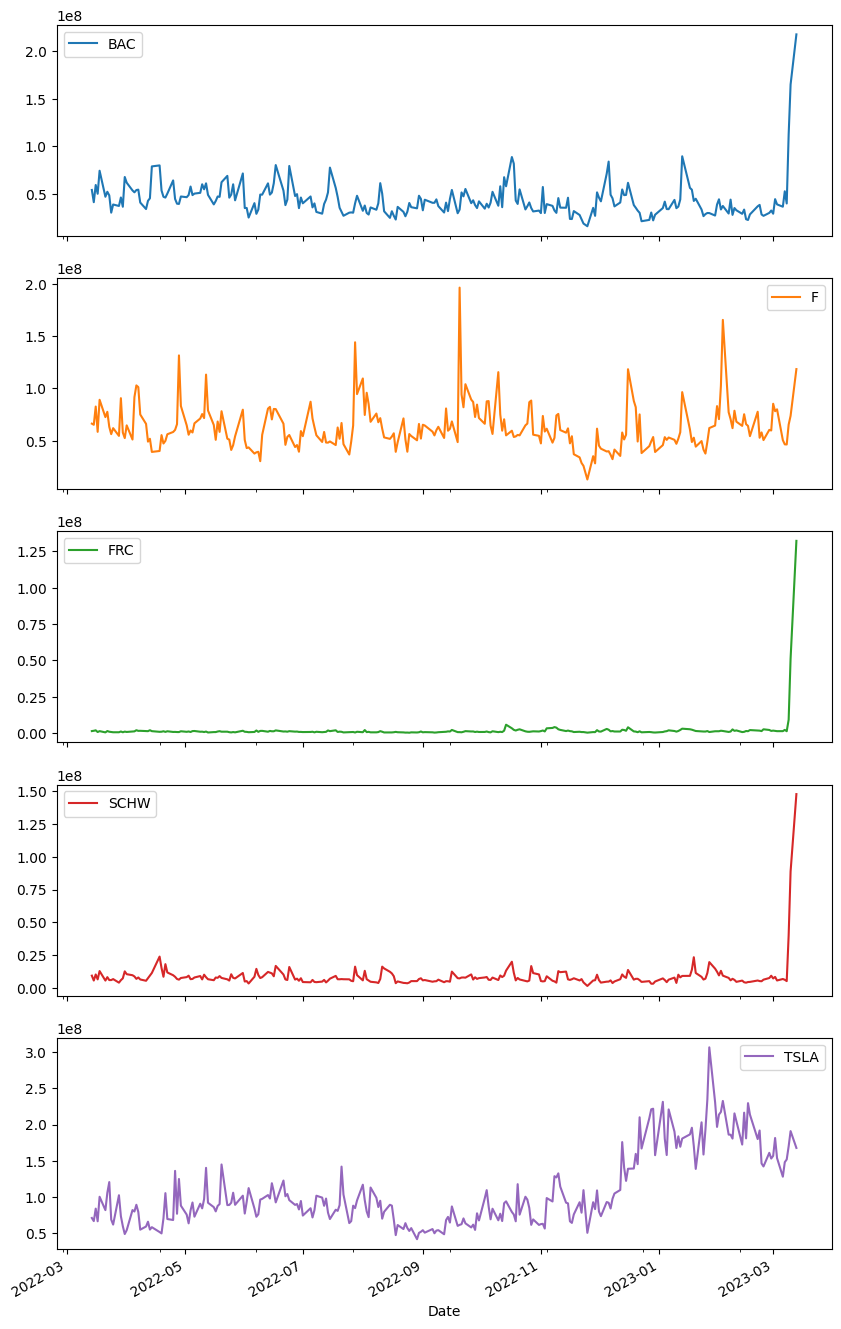

In [200]:
volume = ticker.Volume
volume

print(volume.describe())
volume.plot(subplots=True, figsize=(10,18))


In [201]:
high = ticker.High
high.to_csv('high.csv')
figure = px.bar(high)
figure.show()

In [202]:
low = ticker.Low.to_csv('low.csv')
figure = px.line(ticker.Low)
figure.show()

In [203]:
high1 = px.box(ticker.High)
high1.show()
high.describe()

,BAC,F,FRC,SCHW,TSLA
count,251.000000,251.000000,251.000000,251.000000,251.000000
mean,35.477470,13.773805,142.467848,75.244382,242.856029
std,2.991154,1.599494,18.014793,7.661086,63.717575
min,29.715000,11.210000,42.000000,54.900002,111.750000
25%,33.525000,12.475000,126.924999,69.800003,196.635002
50%,34.959999,13.520000,143.759995,75.879997,239.996674
75%,36.955000,15.115000,156.869995,80.855000,296.699997
max,44.630001,17.799999,174.210007,93.160004,384.290009


In [204]:

dividend = ticker.Dividends
dividend



,BAC,F,FRC,SCHW,TSLA
Date,,,,,
2022-03-14,0.0,0.0,0.0,0.0,0.0
2022-03-15,0.0,0.0,0.0,0.0,0.0
2022-03-16,0.0,0.0,0.0,0.0,0.0
2022-03-17,0.0,0.0,0.0,0.0,0.0
2022-03-18,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...
2023-03-07,0.0,0.0,0.0,0.0,0.0
2023-03-08,0.0,0.0,0.0,0.0,0.0
2023-03-09,0.0,0.0,0.0,0.0,0.0


In [215]:
High_Low = ticker.loc[:, ['High', 'Low' ]]
High_Low.head()
High_Low.max()
#High_Low.plot(subplots=True, figsize=(10,10))
#ax = High_Low.unstack(level=0).plot(figsize=(14,6))

High  BAC      44.630001
      F        17.799999
      FRC     174.210007
      SCHW     93.160004
      TSLA    384.290009
Low   BAC      43.700001
      F        17.200001
      FRC     168.570007
      SCHW     91.029999
      TSLA    362.433319
dtype: float64